# Стоимость автомобилей в компании «Не бит, не крашен»
    
Мы работаем для сервиса по продаже автомобилей "Не бит, не крашен". Сервис разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В нашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Нам нужно построить модель для определения стоимости.

Предоставленная информация представляет собой датасет с признаками и целевым признаком. Признаки - характеристики автомобиля, данные об анкете и пользователе. Целевой признак - цена.

Цель - предсказать ориентировочную стоимость автомобиля, опираясь на историеские данные. Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.
    
____



В данной работе представлен процесс создания моделей с предварительной подготовкой информации. Каждый значительный шаг сопровождается промежуточным, либо общим выводом.
  
    
    
____
    
    

    
Часть 1. Изучение общей информации о предоставленном датасете
    
1. Импорт необходимых библиотек для работы с данными, загрузка датасета
2. Изучение данных, получение общей информации
3. Вывод

    
Часть 2. Предобработка данных

1. Удаление бесполезной информации
1. Обработка пропусков
1. Кодирование признаков
1. Приведение названий столбцов к нижнему регистру
    
Часть 3. Создание моделей
    
1. Разделение датасета на выборки
2. Масштабирование признаков
3. Создание модели случайного леса
4. Создание линейной модели
5. Создание легкой машины градиентного бустинга 
    
Часть 4. Анализ моделей

## Часть 1. Изучение общей информации о предоставленном датасете

<a id='Импорт необходимых библиотек для работы с данными, загрузка датасета'>

### <p style="text-align:center"> Импорт необходимых библиотек для работы с данными, загрузка датасета</p>

Импортируем необходимые библиотеки, разбиваем на смысловые блоки.

In [1]:
import pandas as pd
import numpy as np
import re
import timeit
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import warnings
warnings.simplefilter('ignore')

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import lightgbm as lgb

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error

Загружаем датасет, проверяем вывод.

In [4]:
raw_data = pd.read_csv('/datasets/autos.csv')

In [5]:
raw_data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


<a id='Изучение данных, получение общей информации'></a>

### <p style="text-align:center"> Изучение данных, получение общей информации</p>

Ознакомимся с информацией, посмотрим соответствуют ли типы ячеек назначению. В качестве дополнительной проверки возьмем случайные 20 строк из нашего датасета, посмотрим на странные, выбивающиеся, отсутствующие значения.

In [6]:
raw_data.sample(n=20, random_state=1)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
60723,2016-03-10 09:53:50,12899,bus,2008,manual,116,sharan,125000,11,lpg,volkswagen,no,2016-03-10 00:00:00,0,48607,2016-04-06 07:16:55
234141,2016-03-18 00:55:59,5980,wagon,2008,auto,140,passat,150000,4,gasoline,volkswagen,no,2016-03-17 00:00:00,0,36043,2016-03-29 12:18:15
149319,2016-03-07 17:50:57,14000,bus,2008,manual,108,sprinter,100000,10,gasoline,mercedes_benz,no,2016-03-07 00:00:00,0,25524,2016-04-06 19:18:03
301751,2016-04-05 02:37:15,850,small,1999,manual,54,corsa,150000,10,petrol,opel,no,2016-04-05 00:00:00,0,51067,2016-04-07 11:16:33
71032,2016-03-12 21:42:05,6499,bus,2007,auto,120,zafira,150000,7,gasoline,opel,no,2016-03-12 00:00:00,0,84130,2016-03-12 21:42:05
193340,2016-03-19 18:44:05,800,small,1999,auto,65,fortwo,150000,0,petrol,smart,yes,2016-03-19 00:00:00,0,67700,2016-03-19 18:44:05
108629,2016-03-16 12:58:58,950,NaN,2014,NaN,0,other,60000,4,NaN,volkswagen,NaN,2016-03-16 00:00:00,0,70178,2016-03-16 12:58:58
265628,2016-03-12 15:54:52,7990,convertible,2007,manual,140,astra,70000,7,petrol,opel,no,2016-03-12 00:00:00,0,82205,2016-03-19 17:47:28
334282,2016-03-10 15:38:56,7800,sedan,2011,manual,105,focus,100000,3,petrol,ford,no,2016-03-10 00:00:00,0,6231,2016-03-12 19:45:59
192121,2016-03-16 14:46:46,800,small,1998,manual,0,fiesta,100000,0,petrol,ford,no,2016-03-16 00:00:00,0,39393,2016-03-20 13:19:15


Иногда в таблицах в конце есть строка "Итого"(или т.п.), нам она не нужна, убедимся в ее отсутствии.

In [7]:
raw_data.tail()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
354368,2016-03-20 19:41:08,3400,wagon,2002,manual,100,golf,150000,6,gasoline,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
DateCrawled          354369 non-null object
Price                354369 non-null int64
VehicleType          316879 non-null object
RegistrationYear     354369 non-null int64
Gearbox              334536 non-null object
Power                354369 non-null int64
Model                334664 non-null object
Kilometer            354369 non-null int64
RegistrationMonth    354369 non-null int64
FuelType             321474 non-null object
Brand                354369 non-null object
NotRepaired          283215 non-null object
DateCreated          354369 non-null object
NumberOfPictures     354369 non-null int64
PostalCode           354369 non-null int64
LastSeen             354369 non-null object
dtypes: int64(7), object(9)
memory usage: 43.3+ MB


In [9]:
raw_data.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


Количество пропущенных значений по признакам.

In [10]:
raw_data.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

Общий процент пропущенных значений.

In [11]:
raw_data.isna().sum().sum() / raw_data.shape[0] / raw_data.shape[1] * 100

3.1936519560119536

Процент пропущеных значений по столбцам.

In [12]:
raw_data.isna().sum() / raw_data.shape[0] * 100

DateCrawled           0.000000
Price                 0.000000
VehicleType          10.579368
RegistrationYear      0.000000
Gearbox               5.596709
Power                 0.000000
Model                 5.560588
Kilometer             0.000000
RegistrationMonth     0.000000
FuelType              9.282697
Brand                 0.000000
NotRepaired          20.079070
DateCreated           0.000000
NumberOfPictures      0.000000
PostalCode            0.000000
LastSeen              0.000000
dtype: float64

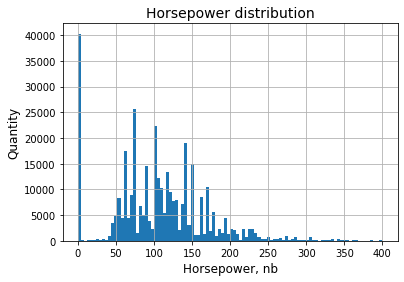

In [13]:
raw_data['Power'].hist(bins = 100, range = (0, 400))
plt.title('Horsepower distribution', fontsize=14);
plt.ylabel('Quantity', fontsize=12);
plt.xlabel('Horsepower, nb', fontsize=12);

Слишком много нулей в признаке Power. Связано, возможно, с тем, что владельцы автомобилей просто не значи точного количества и заполняли их нулями.

Посмотрим на предоставленный список моделей.

In [14]:
raw_data['Model'].unique()

array(['golf', nan, 'grand', 'fabia', '3er', '2_reihe', 'other', 'c_max',
       '3_reihe', 'passat', 'navara', 'ka', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'meriva', 'arosa', 'c4', 'civic', 'transporter',
       'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'corsa', 'one',
       'fortwo', '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta',
       'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort',
       'forester', 'xc_reihe', 'scenic', 'a4', 'a1', 'insignia', 'combo',
       'focus', 'tt', 'a6', 'jazz', 'omega', 'slk', '7er', '80', '147',
       '100', 'z_reihe', 'sportage', 'sorento', 'v40', 'ibiza', 'mustang',
       'eos', 'touran', 'getz', 'a3', 'almera', 'megane', 'lupo', 'r19',
       'zafira', 'caddy', 'mondeo', 'cordoba', 'colt', 'impreza',
       'vectra', 'berlingo', 'tiguan', 'i_reihe', 'espace', 'sharan',
       '6_reihe', 'panda', 'up', 'seicento', 'ceed', '5_reihe', 'yeti',
       'octavia', 'mii', 'rx_reihe', '6er', 'modus', 'fox'

Посмотрим на количество уникальных значений столбцов.

In [15]:
raw_data[['Model', 'VehicleType', 'Brand']].nunique()

Model          250
VehicleType      8
Brand           40
dtype: int64

<a id='Вывод_1'></a>

### <p style="text-align:center"> Вывод</p>

##### В ходе первичного анализа данных были  сделаны следующие выводы:

___


1. Выявлены пропуски в нескольких столбцах датафрейма. 

2. В столбце RegistrationYear присутствуют маловозможные значения, типа 1000. Предположительно, опечатка.

3. Часть значений признака Power заполнена нулями, подозрительно.

4. Признаки с датами не помогут в решении поставленной задачи.

5. Категориальные признаки требуют преобразования.

6. Названиям столбцов необходима корректировка.

7. Судя по дескрипшену, в столбце 	NumberOfPictures нет значений кроме нулей.


___

Таким образом было выполнено первичное ознакомление с предоставленной информацией, выявлены некоторые дефекты датасета. Можно сказать, что данные нуждаются в предобработке. Разберемся с этим в следующей части.

 ## Часть 2. Предобработка данных

<a id='Удаление бесполезной информации'></a>

### <p style="text-align:center">Удаление бесполезной информации</p>

Удаляем столбцы с датами и заполненный нулями столбец NumberOfPictures, а также PostalCode.

In [16]:
raw_data = raw_data.drop(['DateCrawled', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen'], axis=1)

Проверяем.

In [17]:
raw_data.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired
0,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no


<a id='Обработка пропусков'></a>

### <p style="text-align:center">Обработка пропусков</p>

Принято решение заполнить пропуски значением unknown. Нули в Power, RegistrationMonth исправлять не будем.

In [18]:
raw_data[['VehicleType', 'Gearbox', 'Model', 'FuelType', 'NotRepaired']] = raw_data[['VehicleType', 'Gearbox', 'Model',
                                                                                    'FuelType','NotRepaired']].fillna('unknown')

Проверяем.

In [19]:
raw_data.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired
0,480,unknown,1993,manual,0,golf,150000,0,petrol,volkswagen,unknown
1,18300,coupe,2011,manual,190,unknown,125000,5,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,unknown
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no


<a id='Кодирование признаков'></a>

### <p style="text-align:center">Кодирование признаков</p>

Признаки VehicleType, Gearbox, Model, FuelType, Brand и NotRepaired необходимо закодировать, для успешного обучения моделей.

In [20]:
features_to_encode = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'NotRepaired', 'Brand']

In [21]:
encoder = OrdinalEncoder()
encoder.fit(raw_data[features_to_encode])
raw_data[features_to_encode] = pd.DataFrame(encoder.transform(raw_data[features_to_encode]), 
                                            columns=raw_data[features_to_encode].columns) 
raw_data.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired
0,480,7.0,1993,1.0,0,116.0,150000,0,6.0,38.0,1.0
1,18300,2.0,2011,1.0,190,228.0,125000,5,2.0,1.0,2.0
2,9800,6.0,2004,0.0,163,117.0,125000,8,2.0,14.0,1.0
3,1500,5.0,2001,1.0,75,116.0,150000,6,6.0,38.0,0.0
4,3600,5.0,2008,1.0,69,101.0,90000,7,2.0,31.0,0.0


<a id='Приведение названий столбцов к нижнему регистру'></a>

### <p style="text-align:center">Приведение названий столбцов к нижнему регистру</p>

Применим функцию для перевода названий столбцов к snake case.

In [22]:
def make_it_snake_case(data):
    '''Returns df with the same columns, but in snake case.'''
    new_columns = []
    for column in data.columns:
        column = re.sub(r'([a-z0-9])([A-Z])', r'\1_\2', column).lower()
        column = column.replace('__', '_')
        new_columns.append(column)
    data.columns = new_columns

In [23]:
make_it_snake_case(raw_data)

In [24]:
raw_data.head()

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired
0,480,7.0,1993,1.0,0,116.0,150000,0,6.0,38.0,1.0
1,18300,2.0,2011,1.0,190,228.0,125000,5,2.0,1.0,2.0
2,9800,6.0,2004,0.0,163,117.0,125000,8,2.0,14.0,1.0
3,1500,5.0,2001,1.0,75,116.0,150000,6,6.0,38.0,0.0
4,3600,5.0,2008,1.0,69,101.0,90000,7,2.0,31.0,0.0


<a id='Вывод_2'></a>

### <p style="text-align:center"> Вывод</p>

##### В ходе предобработки данных была проделана следующая работа:

___


1. В первую очередь <a href='#Удаление бесполезной информации'>удалили</a> несколько ненужных столбцов.


2. Затем <a href='#Обработка пропусков'>заполнили</a> пропуски в столбце Tenure, попробовав при этом различные варианты.


3. <a href='#Кодирование признаков'>Произвели</a> кодирование признаков, закодировав их отдельно для линейных моделей и деревьев/лесов.


4. После этого <a href='#Приведение названий столбцов к нижнему регистру'>привели</a> названия столбцов к snake case.


___

Таким образом была выполнена предобработка, переходим к непосредственному решению задачи.

 ##  Часть 3. Создание моделей

<a id='Разделение датасета на выборки'></a>

### <p style="text-align:center"> Разделение датасета на выборки</p>

In [25]:
features = raw_data.drop('price', axis=1)
target = raw_data['price']

In [26]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=228)

Проверим разбиение.

In [27]:
print('Признаки обучающей выборки:',features_train.shape,
      'Целевой признак обучающей выборки:', target_train.shape, 
      'Признаки тестовой выборки:', features_test.shape,
      'Целевой признак тестовой выборки:', target_test.shape)

Признаки обучающей выборки: (283495, 10) Целевой признак обучающей выборки: (283495,) Признаки тестовой выборки: (70874, 10) Целевой признак тестовой выборки: (70874,)


<a id='Масштабирование признаков'></a>

### <p style="text-align:center"> Масштабирование признаков </p>

Выберем числовые строки для масштабирования.

In [28]:
numeric = ['registration_year', 'power', 'kilometer', 'registration_month']

Проведем масштабирование.

In [29]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Проверяем.

In [31]:
features_train.head()

,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired
197914,1.0,-0.259134,1.0,-0.208898,228.0,-1.010518,-1.265711,6.0,33.0,0.0
195416,1.0,-0.013352,0.0,0.464413,76.0,0.574601,-1.534027,6.0,20.0,1.0
92853,5.0,0.008992,1.0,-0.240961,172.0,0.574601,0.075868,6.0,15.0,0.0
223806,4.0,-0.035696,1.0,0.079664,42.0,0.574601,0.344184,6.0,24.0,0.0
241468,5.0,0.053679,1.0,-0.150117,102.0,0.574601,0.075868,6.0,10.0,2.0


In [32]:
features_test.head()

,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired
299676,7.0,-0.046868,2.0,-0.588304,228.0,0.574601,-1.534027,6.0,11.0,1.0
62485,5.0,0.008992,1.0,-0.240961,246.0,-1.803077,0.075868,6.0,36.0,1.0
333720,8.0,0.008992,1.0,0.159820,29.0,0.574601,0.880815,2.0,1.0,0.0
334174,2.0,-0.270306,0.0,0.576632,18.0,0.574601,-0.460764,7.0,2.0,0.0
232847,5.0,0.053679,1.0,-0.219586,128.0,-0.085865,-0.192448,6.0,10.0,0.0


Масштабирование признаков прошло нормально, однако следует понимать, что это тоже гиперпараметр, и мы можем отказаться от этого шага, если посчитаем это необходимым.

<a id='Создание модели случайного леса'></a>

### <p style="text-align:center"> Создание модели случайного леса</p>

In [33]:
def get_rmse(true, predict):
    return np.sqrt(mean_squared_error(true, predict))

Создадим модель случайного леса.

In [34]:
forest_model = RandomForestRegressor(n_estimators = 50, max_depth = 3)

In [35]:
start = timeit.default_timer()
forest_result = get_rmse(target_test, forest_model.fit(features_train, target_train).predict(features_test))
stop = timeit.default_timer()
forest_time = stop - start
print(f'Time spent: {forest_time:.2f} sec')

Time spent: 40.72 sec


In [36]:
print(f'Средняя ошибка модели - {forest_result:.0f}.')

Средняя ошибка модели - 2951.


Обычно случайный лес показывает себя достаточно неплохо, имеет неплохую точность и достаточно быстра, посмотрим как будет в этой задаче. У этой модели есть несколько гиперпараметров и, соответственно, место для ее улучшения.

<a id='Создание линейной модели'></a>

### <p style="text-align:center"> Создание линейной модели</p>

In [37]:
linear_model = LinearRegression()

In [38]:
start = timeit.default_timer()
linear_result = get_rmse(target_test, linear_model.fit(features_train, target_train).predict(features_test))
stop = timeit.default_timer()
linear_time = stop - start
print(f'Time spent: {linear_time:.2f} sec')

Time spent: 0.40 sec


In [39]:
print(f'Средняя ошибка модели - {linear_result:.0f}.')

Средняя ошибка модели - 3650.


Линейные модели обычно не супер точные, но зато чрезвычайно быстрые, что мы и видим. У модели практически нет гиперпараметров, поэтому улучшить ее не получится.

<a id='Создание легкой машины градиентного бустинга'></a>

### <p style="text-align:center"> Создание легкой машины градиентного бустинга</p>

In [40]:
lgbm_model = lgb.LGBMRegressor(task='train', learning_rate=0.5, verbose=200)

In [41]:
start = timeit.default_timer()
lgbm_model.fit(features_train, target_train, eval_set=[(features_test, target_test)], eval_metric='rmse')
lgbm_prediction = lgbm_model.predict(features_test,num_iteration = lgbm_model.best_iteration_)
lgbm_result = get_rmse(target_test, lgbm_prediction)
stop = timeit.default_timer()
lgbm_time = stop - start
print(f'Time spent: {lgbm_time:.2f} sec')

[1]	valid_0's rmse: 3130.92	valid_0's l2: 9.80266e+06
[2]	valid_0's rmse: 2588.06	valid_0's l2: 6.69803e+06
[3]	valid_0's rmse: 2335.79	valid_0's l2: 5.45591e+06
[4]	valid_0's rmse: 2212.07	valid_0's l2: 4.89327e+06
[5]	valid_0's rmse: 2144.18	valid_0's l2: 4.59749e+06
[6]	valid_0's rmse: 2100.57	valid_0's l2: 4.41241e+06
[7]	valid_0's rmse: 2055.22	valid_0's l2: 4.22392e+06
[8]	valid_0's rmse: 2027.32	valid_0's l2: 4.11003e+06
[9]	valid_0's rmse: 2011.97	valid_0's l2: 4.04802e+06
[10]	valid_0's rmse: 1997.59	valid_0's l2: 3.99037e+06
[11]	valid_0's rmse: 1982.75	valid_0's l2: 3.9313e+06
[12]	valid_0's rmse: 1968.88	valid_0's l2: 3.87647e+06
[13]	valid_0's rmse: 1958.75	valid_0's l2: 3.8367e+06
[14]	valid_0's rmse: 1950.12	valid_0's l2: 3.80299e+06
[15]	valid_0's rmse: 1944.58	valid_0's l2: 3.78138e+06
[16]	valid_0's rmse: 1936.74	valid_0's l2: 3.75097e+06
[17]	valid_0's rmse: 1930.3	valid_0's l2: 3.72605e+06
[18]	valid_0's rmse: 1925.42	valid_0's l2: 3.70723e+06
[19]	valid_0's rmse: 1

In [42]:
print(f'Средняя ошибка модели - {lgbm_result:.0f}.')

Средняя ошибка модели - 1791.


LightGBM - сложная модель постепенного улучшения метрики на каждой итерации, имеет много гиперпараметров, соответственно, долго обучается и способна выдавать наиболее точные результаты. Однако за все надо платить, и минус у этой модели - скорость.

 ## Часть 4. Анализ моделей

<a id='Часть 4. Анализ моделей'></a>

На основании полученных данных можно сделать следующие выводы:


Лучший результат у LightGBM - 1792 на тестовой выборке со временем обучения около 200 - 400 секунд.
Далее идет случайный лес - ошибка около 3000, со скоростью в чуть более 10 секунд.
Завершает линейная регрессия - ошибка около 3650, но с самой высокой скоростью - 0.1 - 0.2 сек.

Таким образом необходимо выбирать между скоростью и точностью и, в зависимости от поставленной задачи, в первом случае выбирать регрессию, а во втором LightGBM. Случайный лес в данном случае - неплохой компромиссный вариант.

Основываясь на том, что наша модель должна онлайн предложить пользователю продукта ориентировочную стоимость его автомобиля (основной критерий - скорость), выбираем линейную модель, как самую быструю.

____ 


Для удобства значения сведены в таблицу ниже.

In [43]:
data = {'model': ['Random Forest', 'Linear Regression', 'LightGBM'], 
        'RMSE':[forest_result, linear_result, lgbm_result],
        'spent_time':[forest_time, linear_time, lgbm_time], 
       }
summary = pd.DataFrame(data=data).round(3)

In [44]:
summary

,model,RMSE,spent_time
0,Random Forest,2951.286,40.718
1,Linear Regression,3649.816,0.400
2,LightGBM,1791.431,324.507


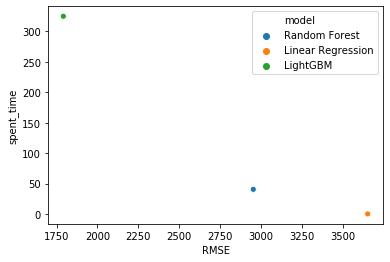

In [45]:
sns.scatterplot(data=summary, x='RMSE', y='spent_time', hue='model');